In [1]:
!pip3 install vnstock
from vnstock import *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

import warnings

warnings.filterwarnings('ignore')

In [3]:
SSI = stock_historical_data(symbol = "SSI", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")


In [4]:
SSI = SSI[['Close']]
SSI

,Close
Time,
2017-06-02,10950
2017-06-05,10740
2017-06-06,10870
2017-06-07,10980
2017-06-08,11060
...,...
2023-12-11,32700
2023-12-12,32600
2023-12-13,32000


In [5]:
SSI['Target'] = SSI.Close.shift(-1)
SSI.dropna(inplace = True)
SSI.head()

,Close,Target
Time,,
2017-06-02,10950,10740.0
2017-06-05,10740,10870.0
2017-06-06,10870,10980.0
2017-06-07,10980,11060.0
2017-06-08,11060,11140.0


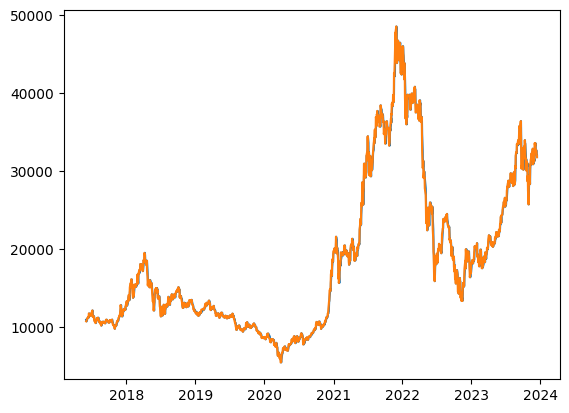

In [6]:
X = SSI[['Close']]
y = SSI[['Target']]
plt.plot(X)
plt.plot(y)
plt.show()

In [7]:
# chia train, test
train_size = int(0.6 * len(SSI))
test_size = len(SSI) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [8]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

SVR(C=1000, degree=2, kernel='poly')

In [9]:
# dự đoán giá đóng cửa trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)


In [10]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))
msle_poly = mean_squared_log_error(y_test, y_pred_poly)


In [11]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)
print("RBF MSLE: ", msle_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)
print("Poly MSLE: ", msle_poly)



RBF MAPE: 37.99006576551512
RBF MAE:  12774.552253592647
RBF Testing RMSE: Target    16489.924703
dtype: float64
RBF MSLE:  0.520196740143418
Poly MAPE: 30.84777849623278
Poly MAE: 10643.310523425645
Poly Testing RMSE: Target    14983.690539
dtype: float64
Poly MSLE:  0.09636787434161433


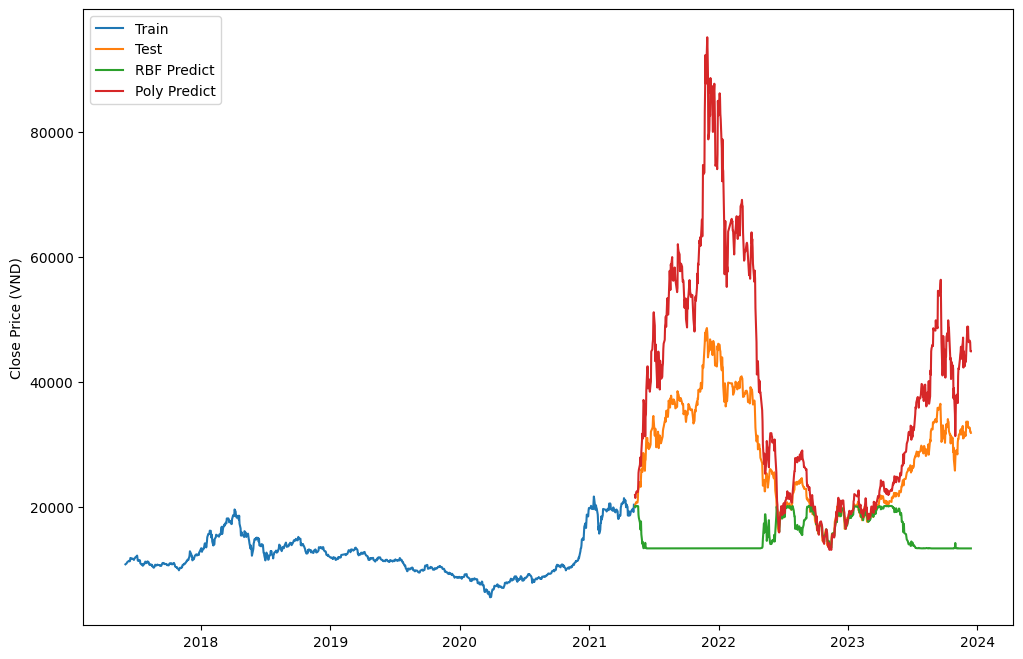

In [14]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.ylabel('Close Price (VND)')
plt.legend(loc = 'upper left')
plt.show()

In [15]:
# lấy giá trị Close của ngày cuối cùng trong dataset
last_row = SSI.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[32000]])

In [16]:
# tạo mảng chứa giá trị predict của 60 ngày tiếp theo
x_next_60_days_rbf = []
x_next_60_days_poly = []
# predict giá Close 60 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_60_days_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_60_days_poly)

Kết quả dự đoán sử dụng RBF: [array([13287.36838618]), array([13288.5573973]), array([13289.75912242]), array([13290.97374043]), array([13292.20143349]), array([13293.4423872]), array([13294.6967906]), array([13295.96483631]), array([13297.24672058]), array([13298.54264339]), array([13299.85280855]), array([13301.17742375]), array([13302.51670072]), array([13303.87085526]), array([13305.24010741]), array([13306.62468146]), array([13308.02480617]), array([13309.44071479]), array([13310.87264521]), array([13312.32084007]), array([13313.78554687]), array([13315.26701814]), array([13316.76551148]), array([13318.28128977]), array([13319.81462129]), array([13321.36577981]), array([13322.93504481]), array([13324.52270155]), array([13326.12904128]), array([13327.75436138]), array([13329.39896552]), array([13331.06316382]), array([13332.74727303]), array([13334.45161674]), array([13336.17652549]), array([13337.92233703]), array([13339.68939651]), array([13341.47805664]), array([13343.28867792])

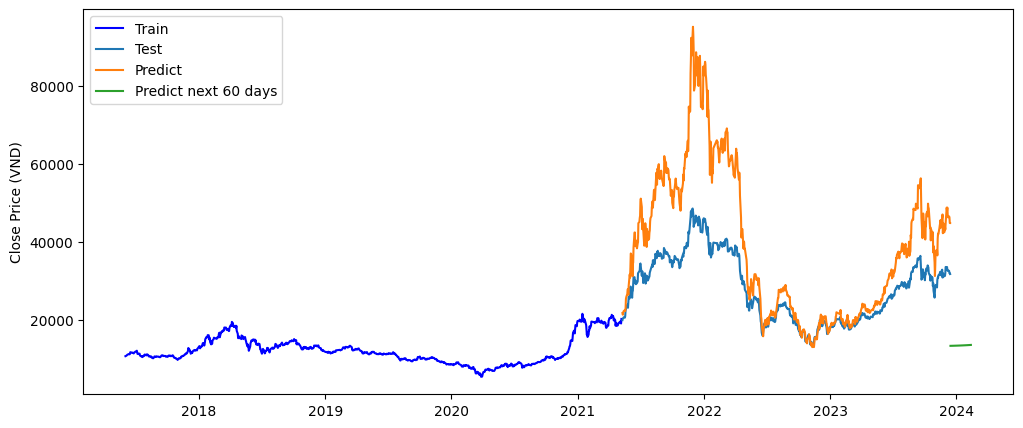

In [20]:
#vẽ mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train', color = 'b')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_poly, label='Predict')

last_date = X_test.index[-1]
next_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
plt.plot(next_dates, x_next_60_days_poly, label='Predict next 60 days')

plt.ylabel('Close Price (VND)')
plt.legend(loc = 'upper left')
plt.show()

